In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
import re

In [276]:
import warnings
warnings.filterwarnings("ignore")

In [277]:
df1 = pd.read_csv("C:/Users/Prince kumar/Downloads/IMDB Dataset.csv")

In [278]:
df = df1.iloc[0:2000]

In [279]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [280]:
df["review"][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [281]:
def clean(text):
    l=[]
    for i in sent_tokenize(text):
        x = re.sub(re.compile("<.*?>")," ",i)
        x = re.sub("[^a-zA-Z0-9]"," ",x)
        x = re.sub(" +"," ",x)
        x = x.lower()
        l.append(x)
    return " ".join(l)

In [282]:
clean("One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.")

'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go  trust me this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs sex or violence  its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda  em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare  forget

In [283]:
clean(df["review"][1])

'a wonderful little production   the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece   the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life   the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears  it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell s murals decorating every surface are terribly well done '

In [284]:
df["review"] = df["review"].apply(clean)

In [285]:
df["review"][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go  trust me this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs sex or violence  its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda  em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare  forget

In [286]:
stopword = set(stopwords.words("english"))
stems = PorterStemmer()
lem = WordNetLemmatizer()

In [287]:
def lem_st(text):
    l=[]
    token = word_tokenize(text)
    for i in token:
        if i not in stopword:
            root = lem.lemmatize(i,pos="v")
            l.append(root)
    return " ".join(l)

In [288]:
lem_st("i am eating food")

'eat food'

In [289]:
from sklearn.preprocessing import LabelEncoder

In [290]:
lem_st(df["review"][1])

'wonderful little production film technique unassuming old time bbc fashion give comfort sometimes discomforting sense realism entire piece actors extremely well choose michael sheen get polari voice pat truly see seamless edit guide reference williams diary entries well worth watch terrificly write perform piece masterful production one great master comedy life realism really come home little things fantasy guard rather use traditional dream techniques remain solid disappear play knowledge sense particularly scenes concern orton halliwell set particularly flat halliwell murals decorate every surface terribly well do'

In [291]:
df["review"] = df["review"].apply(lem_st)

In [292]:
label = LabelEncoder()

In [293]:
df["sentiment"] = label.fit_transform(df["sentiment"])

In [294]:
df.head()

,review,sentiment
0,one reviewers mention watch 1 oz episode hook ...,1
1,wonderful little production film technique una...,1
2,think wonderful way spend time hot summer week...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stun fi...,1


In [295]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [296]:
x = df["review"]
y = df["sentiment"]

In [297]:
x[0:10],y[0:10]

(0    one reviewers mention watch 1 oz episode hook ...
 1    wonderful little production film technique una...
 2    think wonderful way spend time hot summer week...
 3    basically family little boy jake think zombie ...
 4    petter mattei love time money visually stun fi...
 5    probably time favorite movie story selflessnes...
 6    sure would like see resurrection date seahunt ...
 7    show amaze fresh innovative idea 70 first air ...
 8    encourage positive comment film look forward w...
 9    like original gut wrench laughter like movie y...
 Name: review, dtype: object,
 0    1
 1    1
 2    1
 3    0
 4    1
 5    1
 6    1
 7    0
 8    0
 9    1
 Name: sentiment, dtype: int32)

In [298]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=48)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1600,), (400,), (1600,), (400,))

In [299]:
from sklearn.feature_extraction.text import CountVectorizer

In [300]:
cv = CountVectorizer(encoding="utf-8")

In [301]:
x_train_bow = cv.fit_transform(x_train).toarray()

In [302]:
x_test_bow = cv.transform(x_test).toarray()

In [303]:
x_train_bow.shape

(1600, 18674)

In [304]:
 dict(cv.vocabulary_).items()

dict_items([('accord', 365), ('john', 8982), ('ford', 6443), ('lyrically', 10067), ('shoot', 15020), ('fictional', 6185), ('biopic', 1868), ('abraham', 318), ('lincoln', 9775), ('life', 9731), ('greatest', 7210), ('fault', 6071), ('may', 10428), ('obtuseness', 11687), ('woman', 18397), ('ability', 303), ('dance', 4152), ('worst', 18456), ('way', 18114), ('camera', 2545), ('praise', 12866), ('view', 17834), ('reveal', 13931), ('mr', 11092), ('early', 5221), ('film', 6216), ('lack', 9418), ('character', 2899), ('complexities', 3479), ('make', 10169), ('beauty', 1662), ('depth', 4492), ('vision', 17906), ('uncharacteristically', 17285), ('beautiful', 1660), ('compositions', 3493), ('could', 3790), ('series', 14820), ('gorgeous', 7102), ('still', 15877), ('frame', 6529), ('unique', 17443), ('eye', 5927), ('tell', 16526), ('story', 15921), ('sing', 15166), ('hopeful', 7945), ('young', 18592), ('man', 10209), ('henry', 7706), ('fonda', 6416), ('play', 12645), ('contemplative', 3645), ('spont

# $Applying Machine Learning Model$

In [305]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.svm import SVC

In [306]:
rn =RandomForestClassifier()

In [307]:
rn.fit(x_train_bow,y_train)

RandomForestClassifier()

In [308]:
pred = rn.predict(x_test_bow)

In [309]:
pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [310]:
rn.score(x_train_bow,y_train)

1.0

In [311]:
rn.score(x_test_bow,y_test)

0.83

In [312]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,precision_score,recall_score

In [313]:
cm = confusion_matrix(y_test,pred)

In [314]:
cm

array([[162,  39],
       [ 29, 170]], dtype=int64)

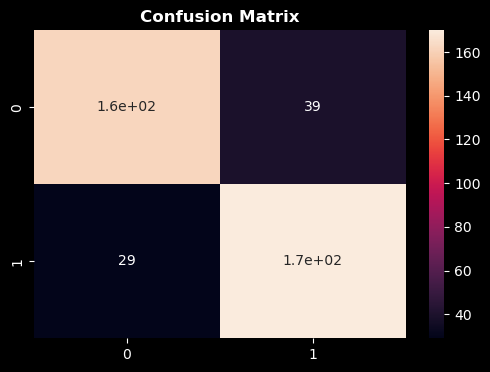

In [315]:
plt.style.use('dark_background')
#plt.set_facecolor('#000035')
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix",fontweight="bold")

plt.show()

In [316]:
precision_score(y_test,pred)

0.8133971291866029

In [317]:
recall_score(y_test,pred)

0.8542713567839196

In [ ]:
# plt.style.use('dark_background')
# fig, ax = plt.subplots(figsize=(20,15))
# ax.set_facecolor('#000035')
# ax.plot(y_test, color='blue', linewidth=2, label='Original')
# plt.plot(pred, color='yellow', linewidth=2.5, label='Predicted')
# plt.title('Netflix Stock Price Prediction')
# plt.legend();

In [ ]:
r = RandomForestClassifier()

In [323]:
# param = {
#     "n_estimators" :[100,150,200,250,300],
#     "criterion" : ["gini","entropy","log_loss"],
#     "max_depth" :[10,20,40,60],
#     "max_features":["sqrt","log2",None]
# }